In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [5]:
df = pd.read_excel('student_scores.xlsx')

In [6]:
print("Ukuran dataset:", df.shape)


Ukuran dataset: (25, 2)


In [7]:
print("\nInfo data:")
print(df.info())



Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hours (x)   25 non-null     float64
 1   Scores (y)  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None


In [8]:
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
       Hours (x)  Scores (y)
count  25.000000   25.000000
mean    5.012000   51.480000
std     2.525094   25.286887
min     1.100000   17.000000
25%     2.700000   30.000000
50%     4.800000   47.000000
75%     7.400000   75.000000
max     9.200000   95.000000


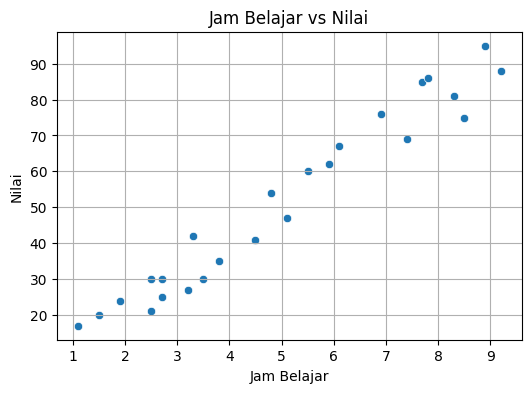

In [9]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Hours (x)', y='Scores (y)', data=df)
plt.title('Jam Belajar vs Nilai')
plt.xlabel('Jam Belajar')
plt.ylabel('Nilai')
plt.grid(True)
plt.show()

In [10]:
correlation = df.corr()
print("\nKorelasi antar variabel:")
print(correlation)


Korelasi antar variabel:
            Hours (x)  Scores (y)
Hours (x)    1.000000    0.976191
Scores (y)   0.976191    1.000000


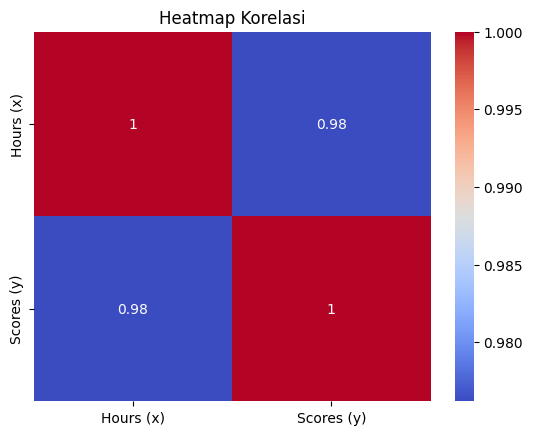

In [11]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

feature engineering:

In [12]:
# 1. Cek duplikat
print("Jumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [13]:
# 2. Cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
Hours (x)     0
Scores (y)    0
dtype: int64


In [14]:
# 3. Visualisasi boxplot untuk outlier
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

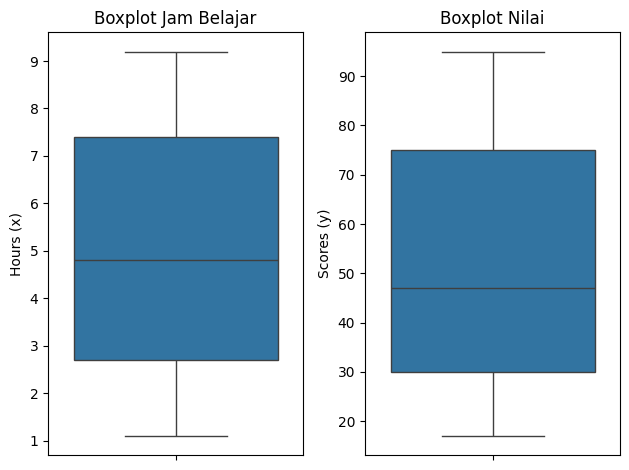

In [15]:
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Hours (x)'])
plt.title('Boxplot Jam Belajar')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Scores (y)'])
plt.title('Boxplot Nilai')

plt.tight_layout()
plt.show()

Modeling

In [17]:
# Mrmisahkan fitur dan target
X = df[['Hours (x)']]
y = df['Scores (y)']

In [18]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Fungsi evaluasi
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluasi {model_name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))


In [22]:
# Evaluasi kedua model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")


Evaluasi Linear Regression
MAE: 3.9207511902099244
MSE: 18.943211722315272
RMSE: 4.352380006653288
R2 Score: 0.9678055545167994

Evaluasi Decision Tree
MAE: 5.4
MSE: 31.7
RMSE: 5.630275304103699
R2 Score: 0.9461250849762066


**KESIMPULAN**
Berdasarkan hasil evaluasi, Linear Regression menunjukkan performa yang lebih baik daripada Decision Tree. karena Model ini memiliki
Error yang lebih rendah (MAE, MSE, RMSE) sN Nilai R² Score yang lebih tinggi (mendekati 1), yang berarti model mampu menjelaskan variasi data lebih baik.

Linear Regression bisa diterapkan sebagai model utama dalam prediksi nilai berdasarkan jam belajar.